# Research of ads for the sale of apartments

The Yandex service data is at your disposal.Real estate — archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity. 

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and reservoir.

### Open the data file and examine the general information.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as mpl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

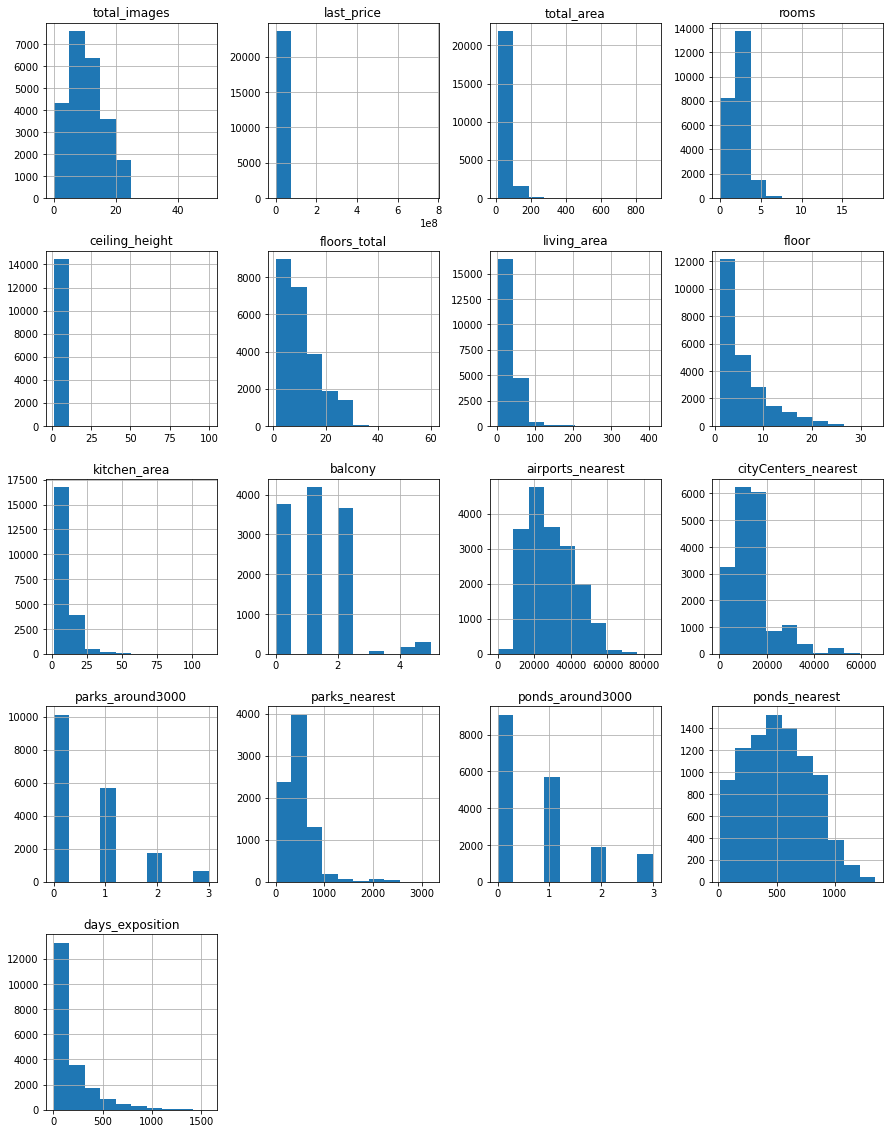

In [2]:
raw_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(raw_data.info(), raw_data.isna().sum())
ax = raw_data.hist(figsize=(15, 20))

### Conclusion 

All three data types are present: int, float and bool. Several columns have a large number of passes – this is the height of the ceilings, the type of "apartment", the presence of a balcony, the proximity of the airport, park, pond. They will need to be processed and, if possible, remove/fill in the missing values, since the price may depend on these parameters. Column names in a convenient register without spaces and Cyrillic characters are clearly named, they can not be redone.

### Data preprocessing

In [3]:
print(raw_data.columns)
raw_data['ceiling_height'].unique()

def ceiling_type_func(height):
    try:
        if height < 2.5:
            return 'Низкие'
        elif 2.5 <= height <= 3.2:
            return 'Стандартные'
        elif 3.2 < height <= 6:
            return 'Высокие'
        elif height > 6:
            return 'Аномалия'
        else:
            return 'Нет данных'
    except: pass
    
raw_data['ceiling_type'] = raw_data['ceiling_height'].apply(ceiling_type_func)
#квартиры без высоты потолков выделены в отдельную группу. 9к это значительная часть выборки, но пока непонятно, связана ли с другими значениями высота потолков.
raw_data[raw_data['ceiling_type']== 'Аномалия']

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_type
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Аномалия
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Аномалия
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,Аномалия
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,Аномалия
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,Аномалия
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Аномалия
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,Аномалия
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,Аномалия
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Аномалия
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,Аномалия


**All the columns are named legibly.**

In [4]:
raw_data['is_apartment'] = raw_data['is_apartment'].fillna(False)
raw_data.value_counts('is_apartment')

is_apartment
False    23649
True        50
dtype: int64

**It is reasonable to assume that if the apartment is not indicated that it is an apartment, then it is not an apartment.**

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

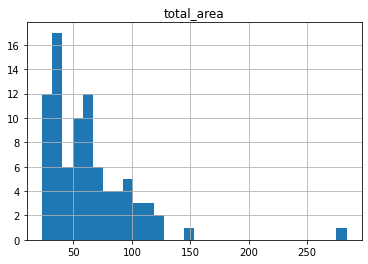

In [5]:
no_floors = raw_data[raw_data['floors_total'].isna()]
no_floors.hist('total_area', bins=30)

In [6]:
display(raw_data['balcony'].isna().sum())
raw_data['balcony'] = raw_data['balcony'].fillna(0)
raw_data['balcony'].isna().sum() #if there is no information about balconies = most likely, there are no balconies

11519

0

In [7]:
display(raw_data.isna().sum())
raw_data.loc[(raw_data['studio']==True) & (raw_data['kitchen_area'].isna()), 'kitchen_area'] = 0
display(raw_data.isna().sum())
#studio apartments do not have a kitchen by definition. all studios with missing values are replaced with 0.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
ceiling_type                0
dtype: int64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2129
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
ceiling_type                0
dtype: int64

In [8]:
#dublicates at locality_name
#display(raw_data['locality_name'].unique())
raw_data['locality_name'] = raw_data['locality_name'].str.replace('ё', 'е')
display(raw_data['locality_name'].unique())
#display(raw_data['locality_name'].value_counts())

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

**Now all the names of localities are unique.**

In [9]:
print(raw_data[raw_data['airports_nearest'].isna()])

       total_images  last_price  total_area first_day_exposition  rooms  \
5                10   2890000.0       30.40  2018-09-10T00:00:00      1   
8                20   2900000.0       33.16  2018-05-23T00:00:00      1   
12               10   3890000.0       54.00  2016-06-30T00:00:00      2   
22               20   5000000.0       58.00  2017-04-24T00:00:00      2   
30               12   2200000.0       32.80  2018-02-19T00:00:00      1   
...             ...         ...         ...                  ...    ...   
23683            16   2100000.0       62.80  2018-09-18T00:00:00      4   
23692             2   1350000.0       30.00  2017-07-07T00:00:00      1   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5                 NaN

In [10]:
#changing the data types to more suitable ones.
raw_data['last_price'] = raw_data['last_price'].astype(int)
raw_data['first_day_exposition'] = pd.to_datetime(raw_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
raw_data['balcony'] = raw_data['balcony'].astype(int)
raw_data['parks_around3000'] = raw_data['parks_around3000'].fillna(0)
raw_data['parks_nearest'] = raw_data['parks_nearest'].fillna(-1)
raw_data['ponds_nearest'] = raw_data['ponds_nearest'].fillna(-1)
raw_data['parks_around3000'] = raw_data['parks_around3000'].astype(int)
raw_data['ponds_around3000'] = raw_data['ponds_around3000'].fillna(0)
raw_data['ponds_around3000'] = raw_data['ponds_around3000'].astype(int)
raw_data['days_exposition'] = raw_data['days_exposition'].fillna(-1)
raw_data['days_exposition'] = raw_data['days_exposition'].astype(int)
#the total number of floors is unknown for 86 rows. display(raw_data[raw_data['floors_total'].isna()]) указывает на то, что пропуски случайны. Их лучше удалить.
raw_data = raw_data.dropna(subset=['floors_total'])
raw_data['floors_total'] = raw_data['floors_total'].astype(int)
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,Стандартные
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,Нет данных
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,Нет данных
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,Нет данных
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,Стандартные


Balconies, parks and ponds are counted in pieces, converted to integers. If there is no information, most likely there is no pond/park/balcony, so the omissions are replaced with zeros.

And so, I removed the omissions and cleaned the names from explicit and implicit duplicates. The remaining passes raise questions – the ceiling height is filtered out, but the passes are most likely due to the residents' ignorance of what height they are. The area of the apartment is also not related to other indicators, + data without the area of the apartment occupy no more than 10% of all. Airports and city centers are not specified in about 20% of cases, what to do with them is still unclear – we will leave it as it is.

In [11]:
display(raw_data.isna().sum())
display(raw_data.info())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9118
floors_total               0
living_area             1870
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2085
balcony                    0
locality_name             48
airports_nearest        5532
cityCenters_nearest     5509
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
ceiling_type               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21528 non-null  float64       
 13  balcony         

None

### Calculate and add new columns to the table### Посчитайте и добавьте в таблицу новые столбцы

We find the price of one square meter of housing for each apartment that has an area specified. We will assign a separate category to apartments that do not have an apartment area. 

The price of sq.m. depends on the total price of the apartment (last_price) divided by its area (total_area). Let's call the column sort_price

In [12]:
raw_data['sqrm_price'] = raw_data['last_price'] / raw_data['total_area']
display(raw_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_type,sqrm_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,Стандартные,120370.370370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,Нет данных,82920.792079
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,Нет данных,92785.714286
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,Нет данных,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,Стандартные,100000.000000


We will specify the day of the week, month and year of publication for each ad. Information about the publication date is stored in the first_day_exposition column. Let's call the column that stores information about the day of the week – exposition_weekday, about the month –exposition_month, about the year – exposition_year.

In [13]:
raw_data['exposition_weekday'] = pd.DatetimeIndex(raw_data['first_day_exposition']).weekday
raw_data['exposition_month'] = pd.DatetimeIndex(raw_data['first_day_exposition']).month
raw_data['exposition_year'] = pd.DatetimeIndex(raw_data['first_day_exposition']).year
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_type,sqrm_price,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,-1,Стандартные,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,-1.0,0,-1.0,81,Нет данных,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1,90.0,2,574.0,558,Нет данных,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,2,84.0,3,234.0,424,Нет данных,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,Стандартные,100000.000000,1,6,2018


Столбец с типом этажа квартиры назовем floor_type. 

In [14]:
def floor_type(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == total:
        return 'Последний'
    else:
        return 'Другой'
raw_data['floor_type'] = raw_data.apply(floor_type, axis=1)
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_type,sqrm_price,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,-1,Стандартные,120370.370370,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,-1.0,0,-1.0,81,Нет данных,82920.792079,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558,Нет данных,92785.714286,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3,234.0,424,Нет данных,408176.100629,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,Стандартные,100000.000000,1,6,2018,Другой


Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) назовем distence_toCentre_km

In [15]:
raw_data['distence_toCentre_km'] = (raw_data['cityCenters_nearest'] / 1000).round(0)
display(raw_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_type,sqrm_price,exposition_weekday,exposition_month,exposition_year,floor_type,distence_toCentre_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,-1,Стандартные,120370.370370,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,-1.0,81,Нет данных,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,574.0,558,Нет данных,92785.714286,3,8,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424,Нет данных,408176.100629,4,7,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,Стандартные,100000.000000,1,6,2018,Другой,8.0


### Conduct a research analysis of the data

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_type,sqrm_price,exposition_weekday,exposition_month,exposition_year,floor_type,distence_toCentre_km
3117,19,140000000,631.0,2019-03-30,7,NaN,5,NaN,5,False,...,2,210.0,-1,Нет данных,221870.047544,5,3,2019,Последний,5.0
4237,1,50000000,517.0,2017-10-14,7,NaN,4,332.0,3,False,...,2,540.0,-1,Нет данных,96711.798839,5,10,2017,Другой,2.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,-1.0,14,Высокие,110169.491525,3,2,2019,Другой,5.0
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,...,0,-1.0,1078,Высокие,165680.473373,3,12,2015,Последний,6.0
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,2,210.0,-1,Высокие,221799.746515,1,4,2019,Последний,5.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,2,198.0,111,Высокие,485436.893204,0,12,2017,Другой,5.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2,318.0,106,Стандартные,466666.666667,2,12,2017,Последний,8.0


<AxesSubplot:>

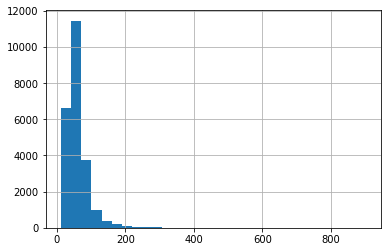

In [16]:
#изучение общей площади квартир
display(raw_data['total_area'].describe())
display(raw_data[raw_data['total_area'] > 500])
display(raw_data['total_area'].hist(bins=30))

Данные похожи на правду – действительно, в СПб есть квартира площадью 900 м. кв. Более 500 – большая редкость, всего 7 вариантов. Посмотрим отдельно квартиры со "стандартной" площадью. 

count    23383.000000
mean        58.149170
std         26.462545
min         12.000000
25%         40.000000
50%         51.800000
75%         68.890000
max        199.200000
Name: total_area, dtype: float64

<AxesSubplot:>

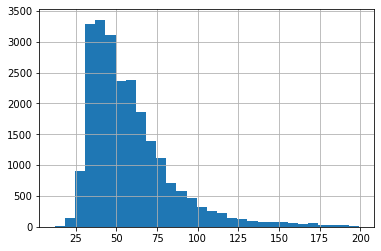

In [17]:
not_huge = raw_data[raw_data['total_area'] < 200]
display(not_huge['total_area'].describe())
display(not_huge['total_area'].hist(bins=30))

Большая часть квартир находятся в диапазоне от 25 до 100 м. кв. 

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

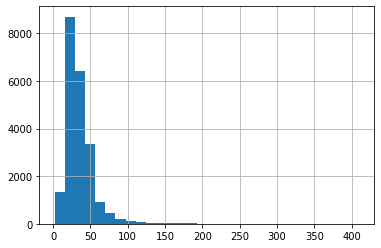

In [18]:
#изучение жилой пллощади квартир
display(raw_data['living_area'].describe())
raw_data['living_area'].hist(bins=30)

График жилой площади похож на общую площадь. Посмотрим, как выглядит жилая площадь у квартир с суммарной площадью менее 500м.кв.

count    21542.000000
mean        33.248381
std         17.348523
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:>

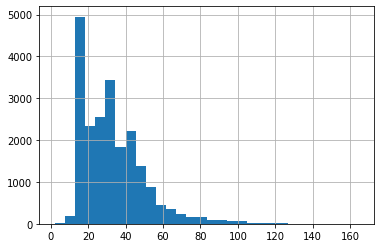

In [19]:
display(not_huge['living_area'].describe())
display(not_huge['living_area'].hist(bins=30))

Большая часть квартир имеет жилую площадь от 15 до 60 м.кв., медиана – 30 кв.м.

count    21328.000000
mean        10.307825
std          5.415578
min          0.000000
25%          7.000000
50%          9.000000
75%         11.900000
max         93.200000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

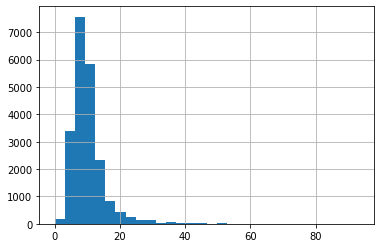

In [20]:
#исследуем площадь кухни
display(not_huge['kitchen_area'].describe())
not_huge['kitchen_area'].hist(bins=30)

count    21528.000000
mean        10.492483
std          5.947796
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

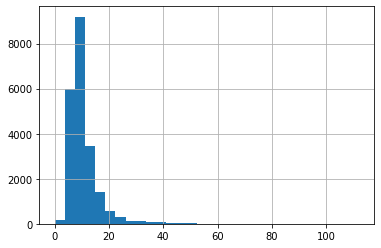

In [21]:
display(raw_data['kitchen_area'].describe())
raw_data['kitchen_area'].hist(bins=30)

Порой кухни бывают больше жилой площади. Но в целом, на ошибку не похоже. Кухни в "гигантских" квартирах в целом не больше кухонь в квартирах поменьше.

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

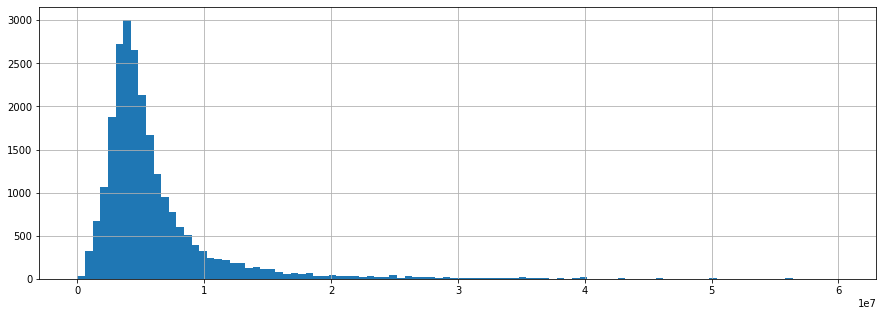

In [22]:
#цена объекта
display(raw_data['last_price'].describe())
raw_data['last_price'].hist(bins=100, range=(0,60000000), figsize=(15,5))

<div class='alert alert-info'>
Не удивительно, что пристижные квартиры – редкость. Почти все квартиры стоят меньше 100.000.000 у.е.
Большая часть квартир – до 20 млн, средняя цена – 6,5 млн.
</div>

0

19

2.071147249396519

2.0

<AxesSubplot:>

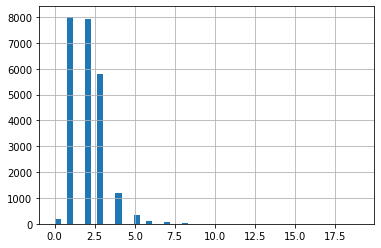

In [23]:
#количество комнат
display(raw_data['rooms'].min())
display(raw_data['rooms'].max())
display(raw_data['rooms'].mean())
display(raw_data['rooms'].median())
raw_data['rooms'].hist(bins=50)

19 комнат это здорово, но чаще всего бывает 1,2 или 3. А чаще 2. 0 комнат – апартаменты.

1.0

6.0

2.726470344255495

2.65

<AxesSubplot:>

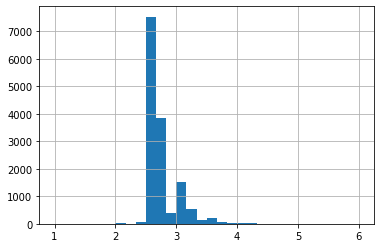

In [24]:
#высота потолков
ceiling_analysis = raw_data[raw_data['ceiling_type'] != 'Аномалия']
display(ceiling_analysis['ceiling_height'].min())
display(ceiling_analysis['ceiling_height'].max())
display(ceiling_analysis['ceiling_height'].mean())
display(ceiling_analysis['ceiling_height'].median())
ceiling_analysis['ceiling_height'].hist(bins=30)

Большая часть квартир имеет потолки 2,65 м. Вероятно, это зависит от типа дома.

1

33

5.877313344344217

4.0

<AxesSubplot:>

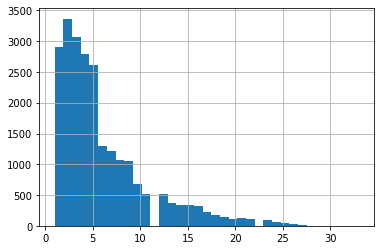

In [25]:
#этаж квартиры
display(raw_data['floor'].min())
display(raw_data['floor'].max())
display(raw_data['floor'].mean())
display(raw_data['floor'].median())
raw_data['floor'].hist(bins=35)

Чаще всего квартиры распологаются на 2 этаже. Выше 33 этажа квартир нет.

Другой       17363
Последний     3336
Первый        2914
Name: floor_type, dtype: int64

<AxesSubplot:ylabel='floor_type'>

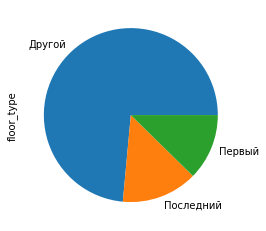

In [26]:
#тип этажа квартиры
data_floor = raw_data['floor_type'].value_counts()
display(data_floor)
data_floor.plot.pie()

Как видно, большая часть квартир занимает промежуточное положение между первым и последним, при этом доли как первого, так и последнего этажей велики.

1

60

10.67382374115953

9.0

5     5788
9     3761
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
52       1
29       1
33       1
37       1
Name: floors_total, dtype: int64

<AxesSubplot:>

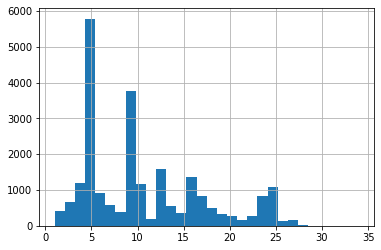

In [27]:
#общее количество этажей в доме
display(raw_data['floors_total'].min())
display(raw_data['floors_total'].max())
display(raw_data['floors_total'].mean())
display(raw_data['floors_total'].median())
display(raw_data['floors_total'].value_counts())
#display(raw_data['floors_total'].hist(bins=30))
low_floors = raw_data[raw_data['floors_total'] < 35]
low_floors['floors_total'].hist(bins=30)

Чтобы график был более читаем, я убрал здания менее 35 этажей, которые встречаюся всего по 1 разу. Пяти- и девятиэтажных зданий больше всего (типичные планы застройки), остальных меньше. Единицы 1 и 2 этажных зданий, равно как и выше 35 этажей.

181.0

65968.0

14185.084014582413

13093.0

<AxesSubplot:>

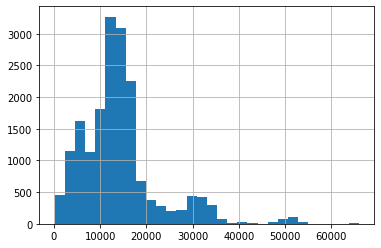

In [28]:
#расстояние до центра города в метрах
display(raw_data['cityCenters_nearest'].min())
display(raw_data['cityCenters_nearest'].max())
display(raw_data['cityCenters_nearest'].mean())
display(raw_data['cityCenters_nearest'].median())
display(raw_data['cityCenters_nearest'].hist(bins=30))

Чаще всего сдаются квартиры от 10 до 20 км до центра города, хотя есть и те, от которых всего 185м, или, например, 66км.

0.0

84869.0

28788.008185387975

26726.0

<AxesSubplot:>

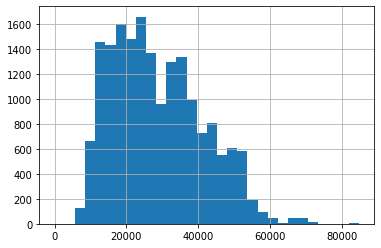

In [29]:
#расстояние до ближайшего аэропорта
display(raw_data['airports_nearest'].min())
display(raw_data['airports_nearest'].max())
display(raw_data['airports_nearest'].mean())
display(raw_data['airports_nearest'].median())
display(raw_data['airports_nearest'].hist(bins=30))

Квартиры находятся в разной удаленности от аэропорта. В среднем – 27-28 км. 

1.0

3190.0

490.5546302050963

455.0

<AxesSubplot:>

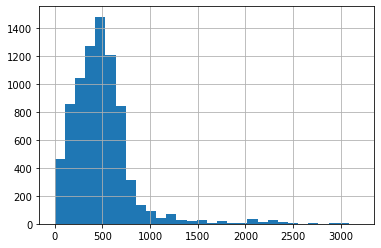

In [30]:
#расстояние до ближайшего парка
parks_data = raw_data[raw_data['parks_nearest'] > 0]
display(parks_data['parks_nearest'].min())
display(parks_data['parks_nearest'].max())
display(parks_data['parks_nearest'].mean())
display(parks_data['parks_nearest'].median())
display(parks_data['parks_nearest'].hist(bins=30))

Большая часть квартир имеет парк в близи – до одного километра. Можно не переживать за отдых с детьми).

0

6

2.5680345572354213

3.0

<AxesSubplot:>

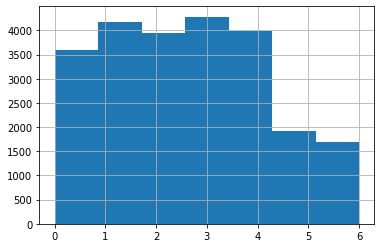

In [31]:
#день публикации объявления
display(raw_data['exposition_weekday'].min())
display(raw_data['exposition_weekday'].max())
display(raw_data['exposition_weekday'].mean())
display(raw_data['exposition_weekday'].median())
display(raw_data['exposition_weekday'].hist(bins=7))

Чаще всего публикуют квартиры в будние дни, из них – вторник и четверг – самые активные.

1

12

6.400076229195782

6.0

<AxesSubplot:>

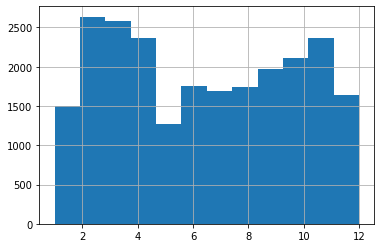

In [32]:
#месяц публикации объявления
display(raw_data['exposition_month'].min())
display(raw_data['exposition_month'].max())
display(raw_data['exposition_month'].mean())
display(raw_data['exposition_month'].median())
display(raw_data['exposition_month'].hist(bins=12))

Январь, Апрель и Декабрь – наименее активные месяцы публикации. Февраль – наиболее активный. 

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

-1

1580

156.4517426841147

73.0

<AxesSubplot:>

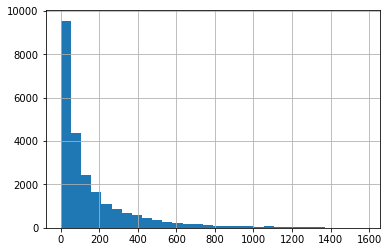

In [33]:
display(raw_data['days_exposition'].min())
display(raw_data['days_exposition'].max())
display(raw_data['days_exposition'].mean())
display(raw_data['days_exposition'].median())
display(raw_data['days_exposition'].hist(bins=30))

Медиана показывает, что квартиры чаще всего сдаются за 5 месяцев. 
Учитывая, что есть квартиры, которые не арендуются по несколько лет подряд, целесообразнее рассмотреть те, которые сдаются в пределах 200 дней отдельным графиком.

45     880
60     538
7      234
30     208
90     201
      ... 
198     23
192     22
148     16
2        3
1        1
Name: days_exposition, Length: 199, dtype: int64

0.2177225616034045

<AxesSubplot:>

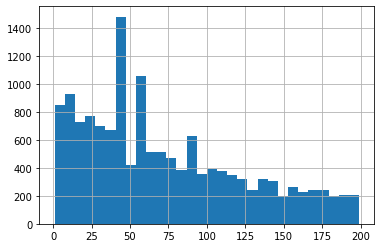

In [34]:
exposition_data = raw_data[raw_data['days_exposition'] < 200]
exposition_data = exposition_data[exposition_data['days_exposition'] > 0]
display(exposition_data['days_exposition'].value_counts())
first_day_percent = 3172 / sum(exposition_data['days_exposition'].value_counts())
display(first_day_percent)
display(exposition_data['days_exposition'].hist(bins=30))

<div class='alert alert-info'>
Медиана в 156 дней складывается потому, что почти все квартиры сдаются за 200 первых дней после выставления объявления, а почти 20% сдаются в первый же день! Все, что сдается более 200 дней – сдается долго. Чаще всего квартиры сдеются за 45 дней.
    
</div>

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

<AxesSubplot:xlabel='total_area'>

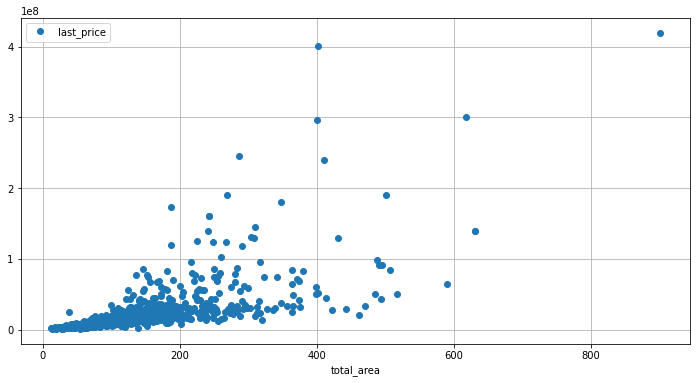

In [35]:
#зависимость цены от общей площади жилья
price_and_area = raw_data.pivot_table(index='total_area', values='last_price')
price_and_area.plot(style='o', grid=True, figsize=(12, 6))

До 200 м.кв. зависимость, вроде бы, прослеживается, однако дальше цена квартиры практически не зависит от общей площади. Посмотрим квартиры до 200 кв.м. отдельно.

<AxesSubplot:xlabel='total_area'>

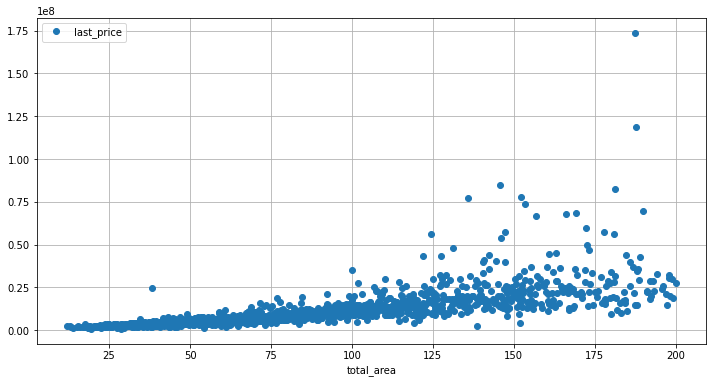

In [36]:
price_and_area_less200 = raw_data[raw_data['total_area'] <= 200].pivot_table(index='total_area', values='last_price')
price_and_area_less200.plot(style='o', grid=True, figsize=(12, 6))

График отдаленно напоминает линейную зависимость, однако есть и квартиры, которые отличаются от общей массы.

<AxesSubplot:xlabel='living_area'>

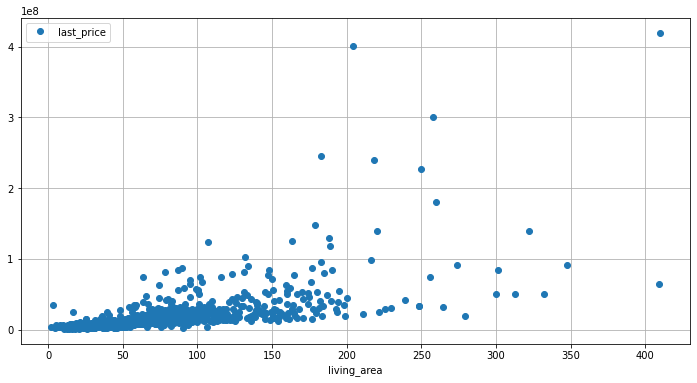

In [37]:
#от жилой площади
price_living_area = raw_data.pivot_table(index='living_area', values='last_price')
price_living_area.plot(style='o', grid=True, figsize=(12, 6))

Здесь график еще меньше напоминает линейную зависимость.

<AxesSubplot:xlabel='kitchen_area'>

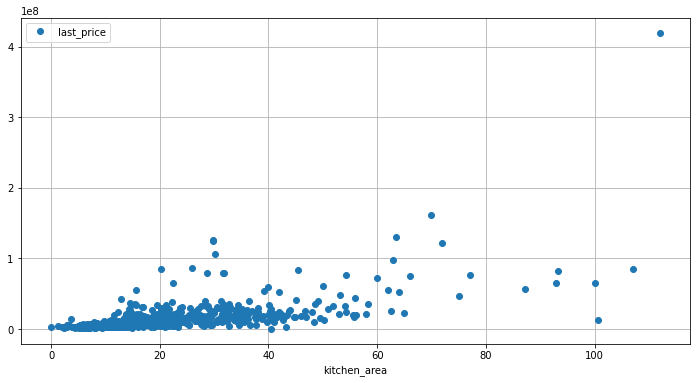

In [38]:
#от площади кухни
price_kitchen_area = raw_data.pivot_table(index='kitchen_area', values='last_price')
price_kitchen_area.plot(style='o', grid=True, figsize=(12, 6))

График похож на линейный – некоторая зависимость есть.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_type,sqrm_price,exposition_weekday,exposition_month,exposition_year,floor_type,distence_toCentre_km
7756,1,4390000,151.8,2017-04-28,6,3.50,6,106.5,6,False,...,0,-1.0,44,Высокие,2.891963e+04,4,4,2017,Последний,2.0
5255,15,6100000,87.0,2017-06-28,6,3.50,3,68.0,2,False,...,3,676.0,-1,Высокие,7.011494e+04,2,6,2017,Другой,34.0
14510,3,6864000,95.0,2018-10-12,6,2.50,15,75.0,3,False,...,2,575.0,12,Стандартные,7.225263e+04,4,10,2018,Другой,11.0
2462,18,7900000,201.5,2018-08-17,7,NaN,2,NaN,2,False,...,0,-1.0,35,Нет данных,3.920596e+04,4,8,2018,Последний,21.0
22122,7,8500000,128.3,2016-06-28,6,NaN,9,81.9,2,False,...,0,-1.0,553,Нет данных,6.625097e+04,1,6,2016,Другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,2,198.0,199,Высокие,5.853659e+05,5,4,2017,Последний,5.0
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,3,140.0,249,Высокие,8.575429e+05,0,4,2017,Другой,6.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,2,198.0,111,Высокие,4.854369e+05,0,12,2017,Другой,5.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2,318.0,106,Стандартные,4.666667e+05,2,12,2017,Последний,8.0


<AxesSubplot:xlabel='rooms'>

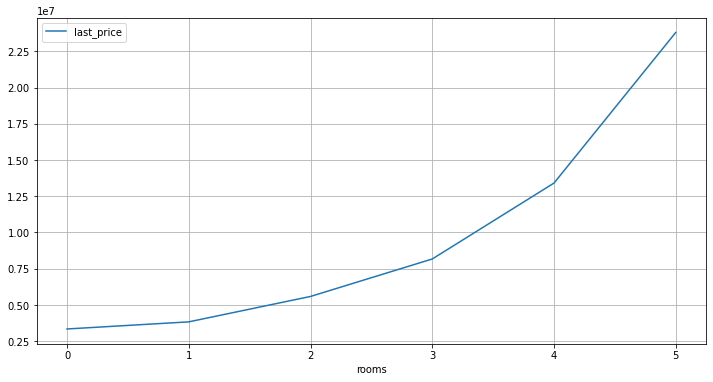

In [39]:
#от количества комнат
display(raw_data[raw_data['rooms']>5].sort_values('last_price'))
#квартиры с большим количеством комнат на выбросы не похожи, но они мешают рассмотреть график. 
#Так как всего 194 квартиры имеет более 5 комнат, проанализируем только те, в которых до 5 включительно.

price_rooms = raw_data[raw_data['rooms'] <= 5].pivot_table(index='rooms', values='last_price')
price_rooms.plot(grid=True, figsize=(12, 6))

Очевидно – чем больше комнат в квартире, тем выше цена. 

<AxesSubplot:xlabel='floor_type'>

<AxesSubplot:xlabel='floor_type'>

<AxesSubplot:xlabel='floor_type'>

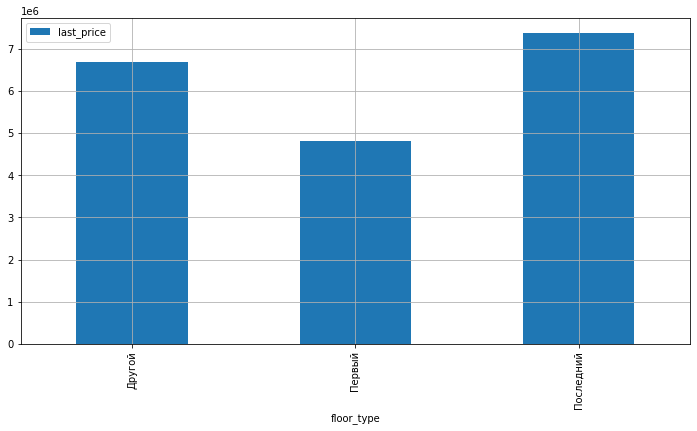

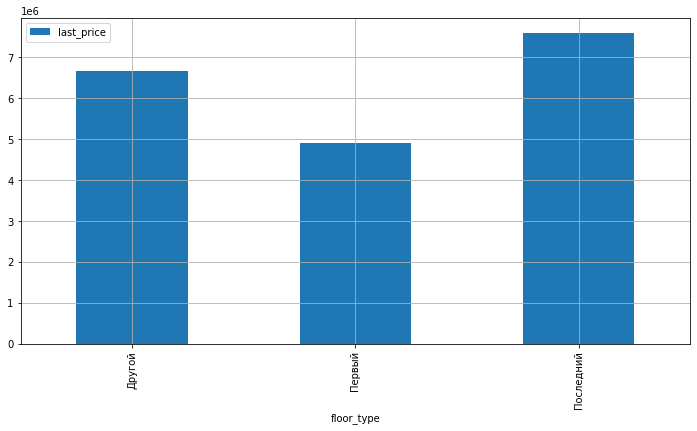

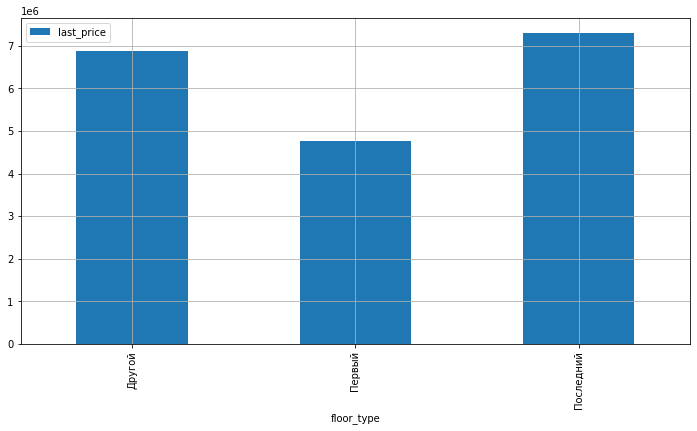

In [40]:
#от типа этажа
price_floor = raw_data.pivot_table(index='floor_type', values='last_price')
display(price_floor.plot(kind = 'bar', grid=True, figsize=(12, 6)))
price_floor = raw_data[raw_data['floors_total'] > 2].pivot_table(index='floor_type', values='last_price')
display(price_floor.plot(kind = 'bar', grid=True, figsize=(12, 6)))
price_floor = raw_data[raw_data['floors_total'] < 16].pivot_table(index='floor_type', values='last_price')
price_floor.plot(kind = 'bar', grid=True, figsize=(12, 6))

Вне зависимости от этажности здания люди предпочтиают последний этаж другим, а первый этаж ценится меньше всего. 

<AxesSubplot:xlabel='exposition_weekday'>

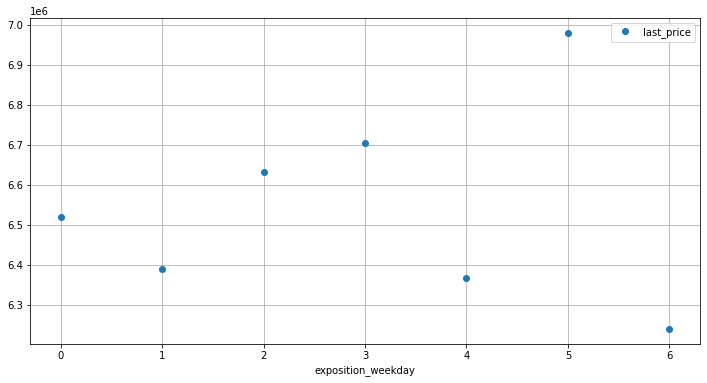

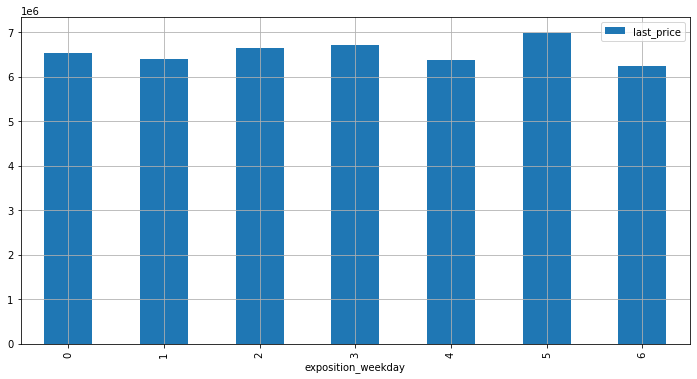

In [41]:
#от дня недели
price_weekday = raw_data.pivot_table(index='exposition_weekday', values='last_price')
price_weekday.plot(style='o',grid=True, figsize=(12, 6))
price_weekday.plot(kind='bar',grid=True, figsize=(12, 6))

Самые дорогие квартиры выставляются в субботу, самые дешевые – в воскресенье. Однако эта разница не очень велика в реальном масштабе (столбчатая диаграмма в данном случае достовернее – она показывает 100% от цены за день, а не только разницу между днями).

<AxesSubplot:xlabel='exposition_month'>

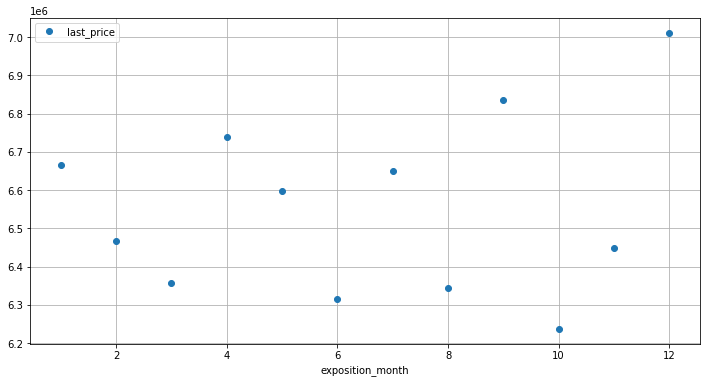

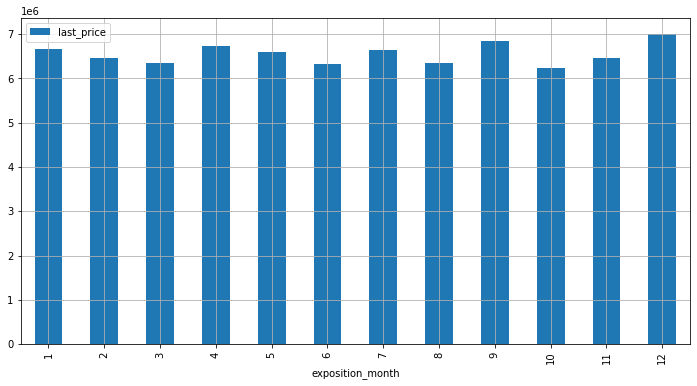

In [42]:
#от месяца
price_month = raw_data.pivot_table(index='exposition_month', values='last_price')
price_month.plot(style='o',grid=True, figsize=(12, 6))
price_month.plot(kind='bar',grid=True, figsize=(12, 6))

По месяцам разница несколько значительнее, чем по дням недели – почти на миллион рублей средняя цена в октябре ниже, чем в декабре.

<AxesSubplot:xlabel='exposition_year'>

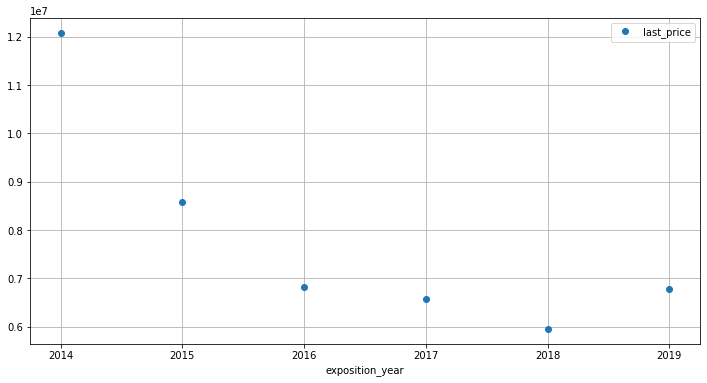

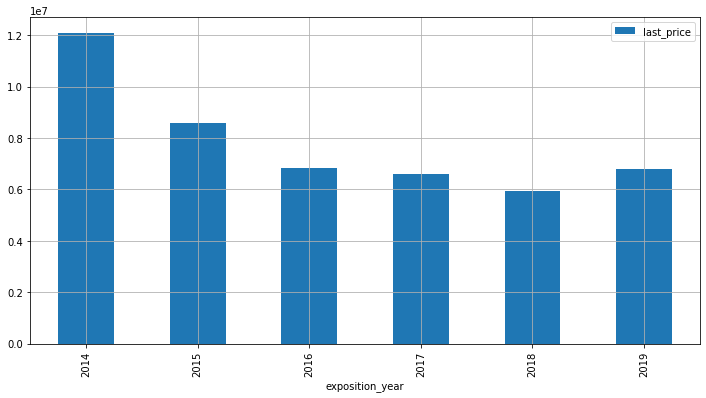

In [43]:
#от года
price_year = raw_data.pivot_table(index='exposition_year', values='last_price')
price_year.plot(style='o',grid=True, figsize=(12, 6))
price_year.plot(kind='bar',grid=True, figsize=(12, 6))

На обоих графиках видна тенденция к значительному снижению стоимости квартир с 2014 по 2018 год. 2019 – многообещающее начало роста стоимости в будущем.

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [44]:
display(raw_data['locality_name'].value_counts().head(10))
flats = raw_data.pivot_table(index='locality_name', values='sqrm_price', aggfunc=['count', 'mean'])
flats.columns = ['Количество объявлений', 'Стоимость кв.м.']

top_10 = flats.sort_values('Количество объявлений', ascending=False).head(10)
top_10.sort_values('Стоимость кв.м.', ascending=False)

Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

,Количество объявлений,Стоимость кв.м.
locality_name,,
Санкт-Петербург,15651,114868.877341
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
поселок Парголово,327,90175.913458
поселок Мурино,552,85629.568678
поселок Шушары,439,78551.344545
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


Самая высокая цена квадратного метра в городах с наибольшим количеством объявлений – в Санкт-Петербурге. Самая низкая цена – в Выборге.

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

,last_price
distence_toCentre_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.113739e+07
4.0,1.330428e+07
5.0,1.445600e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.949111e+06


<AxesSubplot:xlabel='distence_toCentre_km'>

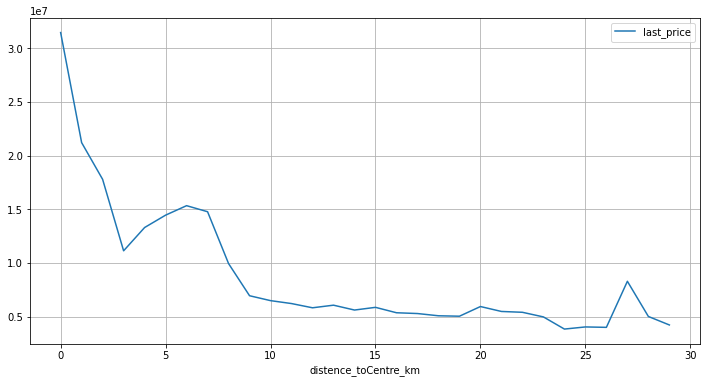

In [45]:
spb_data = raw_data[raw_data['locality_name'] == 'Санкт-Петербург']
spb_pivot = spb_data.pivot_table(index='distence_toCentre_km', values='last_price')
display(spb_pivot)
spb_pivot.plot(grid=True, figsize=(12,6))

in general, the further away from the center, the higher the average price of an apartment. However, there are more expensive apartments within a radius of 5 km from the center of the cultural capital, as well as 25-30 km away.

### General conclusion

The total cost of housing decreased from 2014 to 2018, with a slight increase in 2019. A clear relationship can be traced between the price per square meter and the distance from the center of the capital, the number of rooms, less obvious – between the price and the total area of housing, kitchen area, non-residential area and type of floor. Most often, publications are made on weekdays, at the beginning of spring and at the end of autumn. 

Most often there are 5, 9 and 12-storey buildings. Separately, it is worth paying attention to the height of the ceilings – it is quite difficult to understand whether there are two-storey apartments in the list and whether the ceiling is really so high, or this is an incorrectly added result. rare apartments have more than 5 rooms, most often 2. Despite the fact that I initially removed the type of settlement from the name of the point itself, I decided to return them, because I can not sort the conditional village of Murino from the village of Murino 200 km away.